<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/2_d_knn_CostaRica_PovertyIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coasta Rica Household Poverty Data (kNN)


In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import scale 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix 
from sklearn import metrics


In [22]:
path='/content/drive/MyDrive/Skillsoft/Data/costa_rica_poverty.csv'
rica=pd.read_csv(path)

In [24]:
rica.columns

Index(['household_id', 'ind_id', 'rooms', 'tablet', 'males_under_12',
       'males_over_12', 'males_tot', 'females_under_12', 'females_over_12',
       'females_tot', 'ppl_under_12', 'ppl_over_12', 'ppl_total',
       'years_of_schooling', 'wall_block_brick', 'wall_socket',
       'wall_prefab_cement', 'wall_wood', 'floor_mos_cer_terr', 'floor_cement',
       'floor_wood', 'ceiling', 'electric_public', 'electric_coop',
       'toilet_sewer', 'toilet_septic', 'cookenergy_elec', 'cookenergy_gas',
       'trash_truck', 'trash_burn', 'wall_bad', 'wall_reg', 'wall_good',
       'roof_bad', 'roof_reg', 'roof_good', 'floor_bad', 'floor_reg',
       'floor_good', 'disabled_ppl', 'male', 'female', 'under10', 'free',
       'married', 'separated', 'single', 'hh_head', 'hh_spouse', 'hh_child',
       'num_child', 'num_adults', 'num_65plus', 'num_hh_total',
       'dependency_rate', 'male_hh_head_educ', 'female_hh_head_educ',
       'meaneduc', 'educ_none', 'educ_primary_inc', 'educ_primary',
   

In [ ]:
costa = rica['rooms', 'num_adults', 'Target', 'ppl_per_room', 'years_of_schooling']

In [42]:
costa=rica.loc[:, ['rooms', 'num_adults','Target', 'ppl_per_room', 'years_of_schooling']]

In [43]:
costa.head()

,rooms,num_adults,Target,ppl_per_room,years_of_schooling
0,3,1,4,1.000000,10
1,4,1,4,1.000000,12
2,8,1,4,0.500000,11
3,5,2,4,1.333333,9
4,5,2,4,1.333333,11


In [48]:
costa.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [49]:
costa.rooms.value_counts()

5     2940
4     2587
6     1607
3      890
7      732
8      298
2      188
9      168
1       97
10      43
11       7
Name: rooms, dtype: int64

In [50]:
costa.num_adults.value_counts()

2    4462
3    2199
4    1247
1    1077
5     367
6     107
7      52
9      21
8      20
0       5
Name: num_adults, dtype: int64

In [ ]:
rica.value_counts()

In [52]:
costa['vul']=np.where(costa['Target'] <=3, 'vulnerable', 'non_vulnerable')

In [53]:
costa.head()

,rooms,num_adults,Target,ppl_per_room,years_of_schooling,vul
0,3,1,4,1.000000,10,non_vulnerable
1,4,1,4,1.000000,12,non_vulnerable
2,8,1,4,0.500000,11,non_vulnerable
3,5,2,4,1.333333,9,non_vulnerable
4,5,2,4,1.333333,11,non_vulnerable


In [ ]:
costa.dtypes

In [55]:
costa['vul']= np.where(costa['vul']=='non_vulnerable', True, False)

In [56]:
costa.head()

,rooms,num_adults,Target,ppl_per_room,years_of_schooling,vul
0,3,1,4,1.000000,10,True
1,4,1,4,1.000000,12,True
2,8,1,4,0.500000,11,True
3,5,2,4,1.333333,9,True
4,5,2,4,1.333333,11,True


In [58]:
X=costa[['rooms', 'num_adults', 'ppl_per_room', 'years_of_schooling']]
y=np.array(costa.vul)


In [59]:
X_scaled=scale(X)
X_scaled

array([[-1.33182893, -1.3657179 , -0.73835591,  0.59182995],
       [-0.65077114, -1.3657179 , -0.73835591,  1.01460671],
       [ 2.07346003, -1.3657179 , -1.34818436,  0.80321833],
       ...,
       [ 0.71134445,  1.20715141, -0.43344168, -0.46511194],
       [ 0.71134445,  1.20715141, -0.43344168,  0.80321833],
       [ 0.71134445,  1.20715141, -0.43344168,  0.16905319]])

In [60]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [61]:
#build the model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
predictions=knn.predict(X_test)

In [64]:
print(predictions[0:5])

[ True False  True False  True]


In [67]:
actual_predicted=np.column_stack((y_test, predictions))
print(actual_predicted[0:5])

[[ True  True]
 [ True False]
 [ True  True]
 [ True False]
 [ True  True]]


In [68]:
knn5= confusion_matrix(y_test, predictions)
print(knn5)

[[ 594  468]
 [ 412 1394]]


In [71]:
round(accuracy_score(y_test, predictions), 2)

0.69

In [82]:
metrics.roc_curve(y_test, predictions)

(array([0.        , 0.44067797, 1.        ]),
 array([0.        , 0.77187154, 1.        ]),
 array([2, 1, 0]))

In [75]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)

In [76]:
roc_auc=metrics.auc(fpr, tpr)

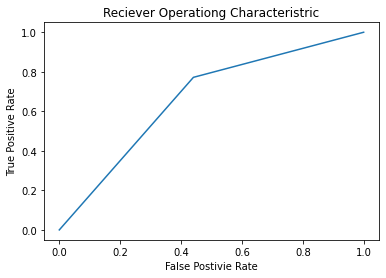

In [81]:
plt.title('Reciever Operationg Characteristric')
plt.plot(fpr, tpr, label='AUC=%0.2f' %roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Postivie Rate')
plt.show()

## Cross Validation Scores (k-fold)

In [84]:
knn= KNeighborsClassifier(n_neighbors=5)
valscore=cross_val_score(knn, X_scaled, y, cv=5)

In [85]:
valscore

array([0.66004184, 0.66213389, 0.6881214 , 0.67399267, 0.6577708 ])

In [86]:
valscore.mean()

0.6684121218490615

In [87]:
k_range=list(range(1, 35))
param_grid=dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]}


In [91]:
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [92]:
grid.fit(X_scaled, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [94]:
grid.cv_results_['mean_test_score']

array([0.62340895, 0.5929579 , 0.64726621, 0.63858025, 0.66620517,
       0.65249885, 0.67164801, 0.66610079, 0.6761457 , 0.67384444,
       0.68315724, 0.68221396, 0.68556398, 0.68211111, 0.68535543,
       0.68221746, 0.68535817, 0.6824259 , 0.68734693, 0.68797356,
       0.68849701, 0.68671701, 0.69309963, 0.69090133, 0.69027394,
       0.68723795, 0.69173881, 0.69006429, 0.69372801, 0.69194889,
       0.69100835, 0.69163596, 0.69153169, 0.68860063])

In [96]:
grid.cv_results_['mean_test_score'].mean()

0.6770401033203486

In [98]:
grid_mean=grid.cv_results_['mean_test_score']

Text(0, 0.5, 'Cross Validated Accuracy')

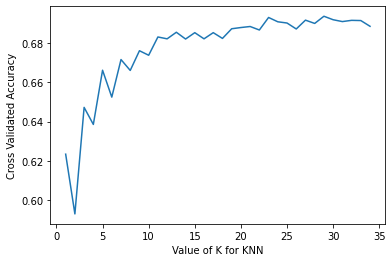

In [99]:
plt.plot(k_range, grid_mean)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

In [100]:
grid.best_score_

0.6937280115665183

In [101]:
grid.best_params_

{'n_neighbors': 29}

In [102]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')